In [ ]:
import pandas as pd
import plotly.express as pl
import plotly.graph_objects as pg
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
path = '/content/telco-churn.csv'
df = pd.read_csv(path)

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df['TotalCharges'].skew()

0.961642499724251

In [ ]:
median = df['TotalCharges'].median()
df['TotalCharges'].fillna(median, inplace=True)

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
label = df['Churn']
label.head(5)

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [ ]:
atribut = df.drop(['Churn'], axis = 1)
atribut.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
columns = df.columns

In [ ]:
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [ ]:
for c in columns:
  print(df[c].describe())
  print()

count           7043
unique          7043
top       7590-VHVEG
freq               1
Name: customerID, dtype: object

count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object

count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

count     7043
unique       2
top        Yes
freq      6361
Name: PhoneService, dtype: object

count     7043
unique       3
top         No
freq      3390
Name: MultipleLines, dtype: object

count            

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


In [ ]:
for c in columns:
  print(df[c].value_counts())
  print()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                   

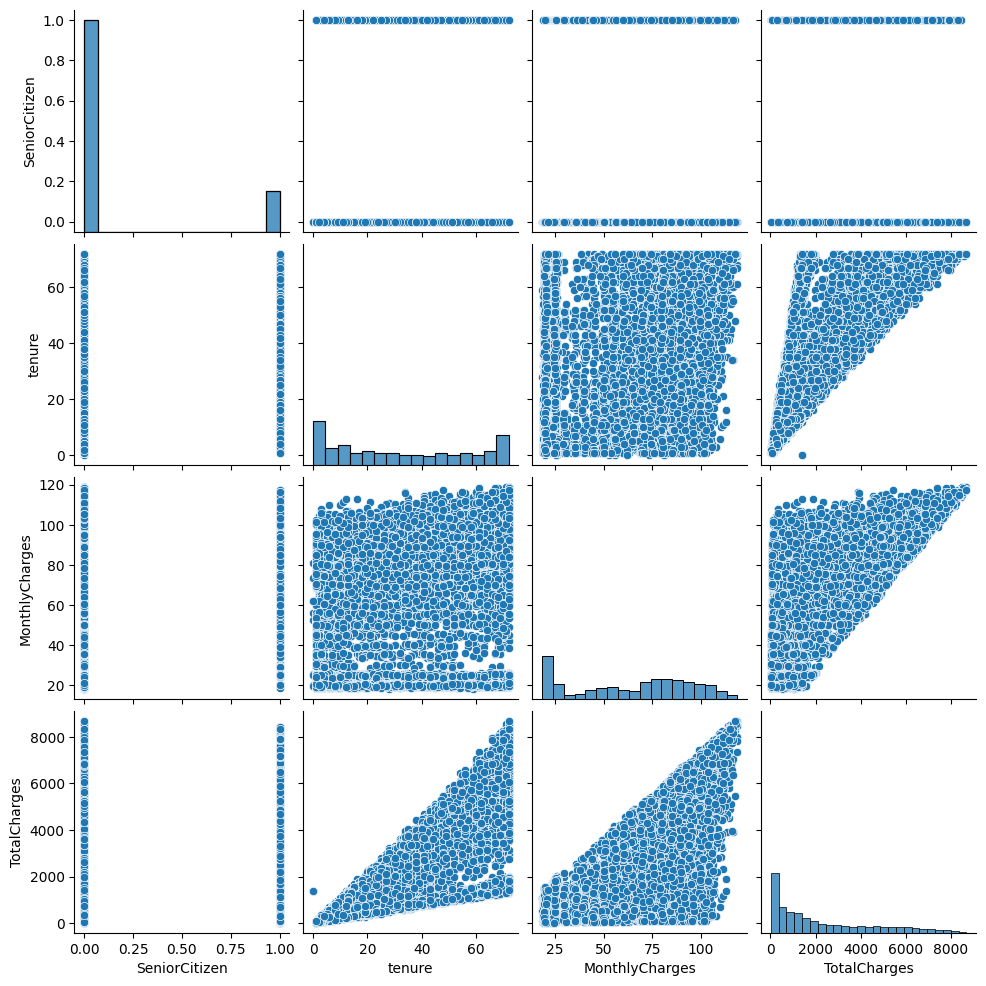

In [ ]:
sns.pairplot(df)

In [ ]:
df['TotalCharges'].value_counts()

1397.475    11
20.200      11
19.750       9
20.050       8
19.900       8
            ..
6849.400     1
692.350      1
130.150      1
3211.900     1
6844.500     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
df['Churn'].value_counts(True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [ ]:
df['Churn'].value_counts(True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [ ]:
fig = pl.pie(values= df['Churn'].value_counts().values, names= df['Churn'].value_counts().index, hole= 0.3)
fig.update_layout(
      height=600,
      width = 800,
      showlegend=True,
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

EDA

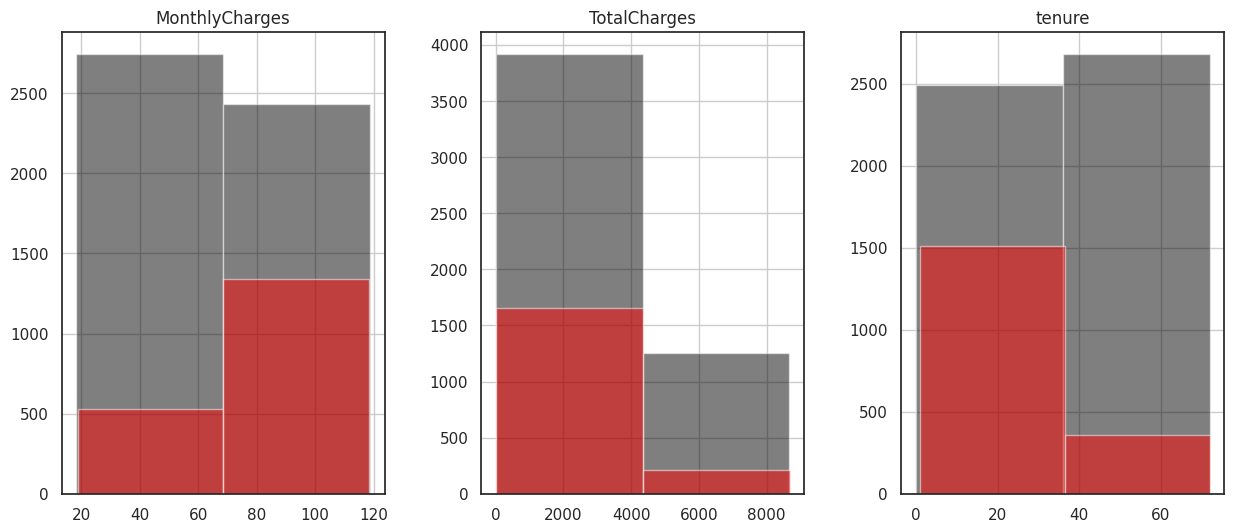

In [ ]:
#membuat distribution diagram untuk 3 variabel numerik
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
#memplot 2 lapisan untuk membedakan mana yang Churn (red) atau Tidak (Black)
df[df.Churn == 0][numerical_features].hist(bins=2, color='black', alpha=0.5, ax=ax)
df[df.Churn == 1][numerical_features].hist(bins=2, color='red', alpha=0.5, ax=ax)
plt.show()

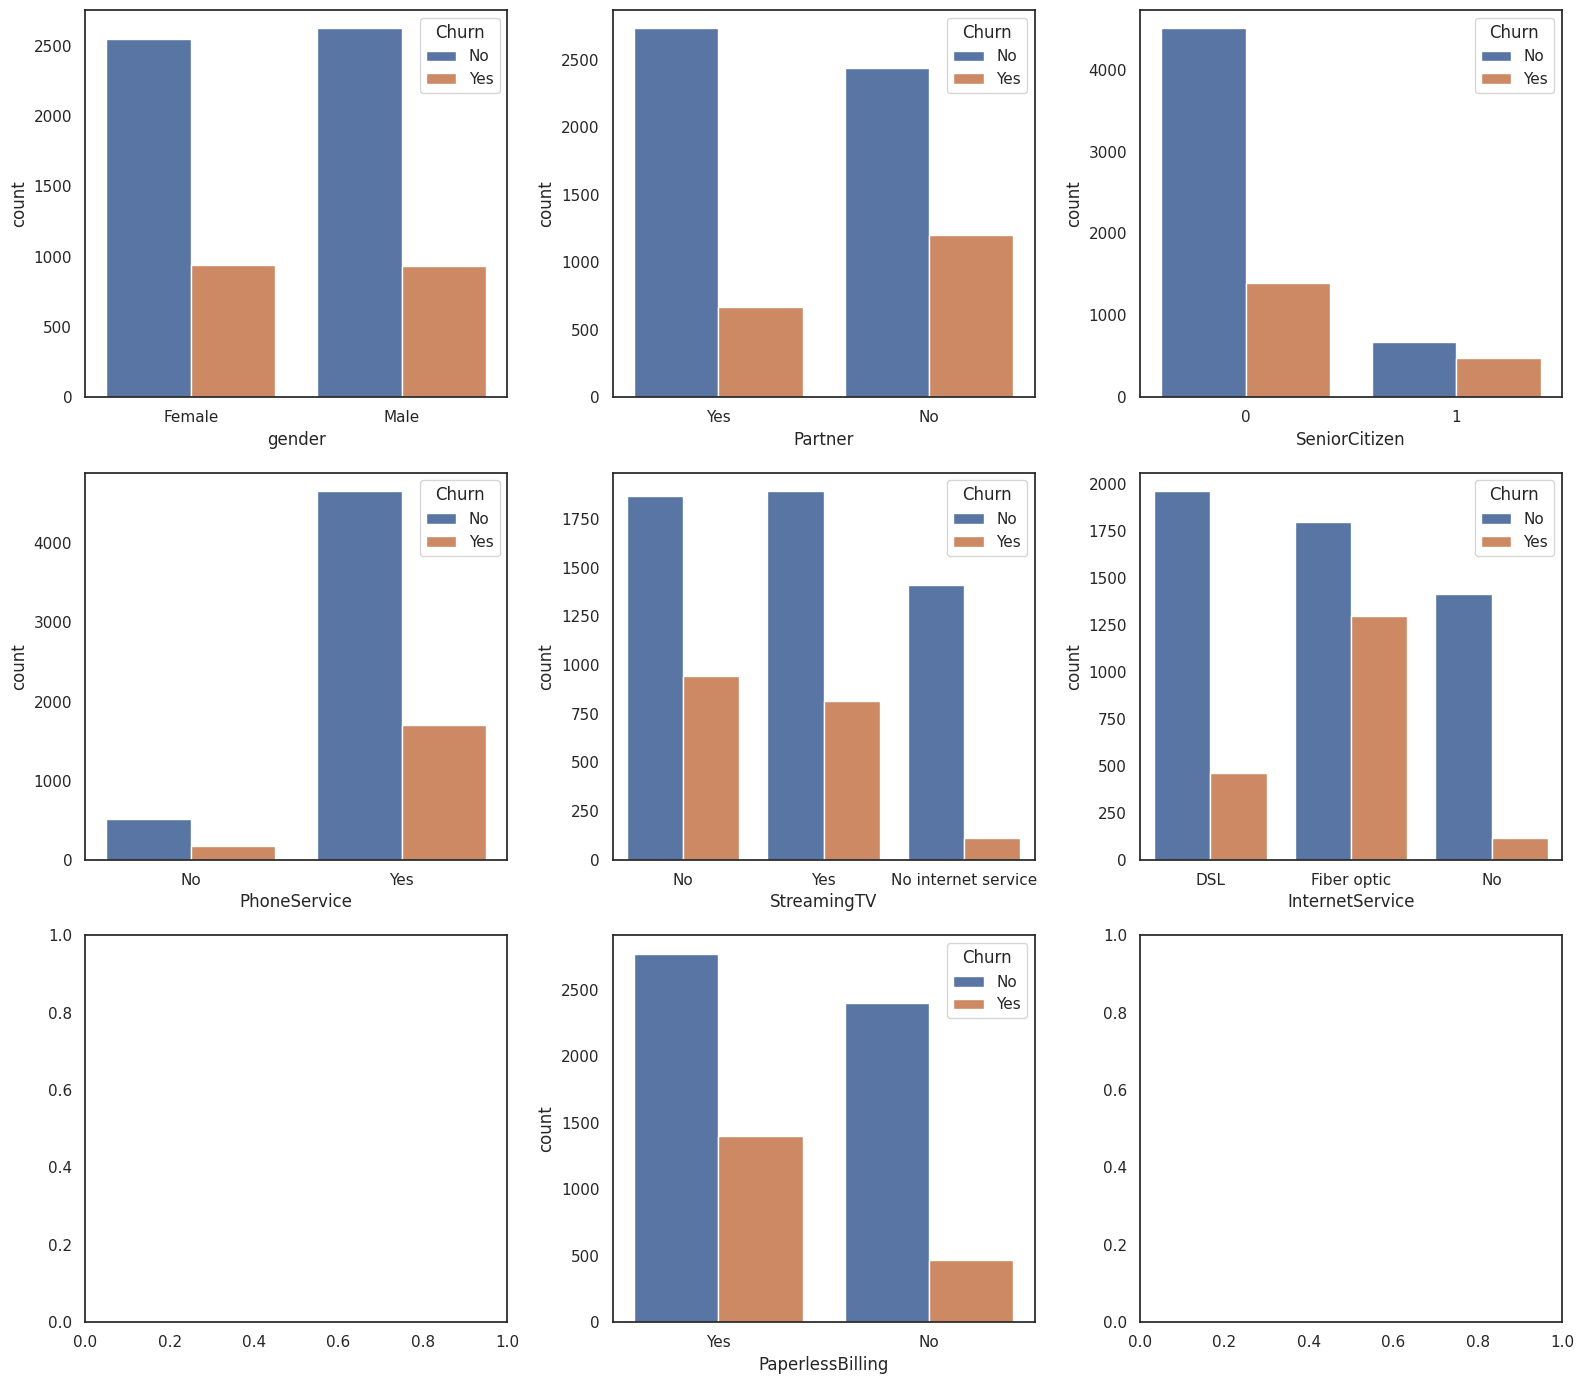

In [ ]:
sns.set(style='white')
# memplot data dengan subplot ukuran 3x3
fig, ax = plt.subplots(3, 3, figsize=(16, 14))
# menampilkan data berdasarkan variabel-variabel kategorikal yang ada
sns.countplot(data=df, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

In [ ]:
df['gender'] = pd.get_dummies(df['gender'], drop_first=True)
df['Partner'] = pd.get_dummies(df['Partner'], drop_first=True)
df['Dependents'] = pd.get_dummies(df['Dependents'], drop_first=True)
df['PhoneService'] = pd.get_dummies(df['PhoneService'], drop_first=True)
df['PaperlessBilling'] = pd.get_dummies(df['PaperlessBilling'], drop_first=True)
df['Churn'] = pd.get_dummies(df['Churn'], drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   uint8  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   uint8  
 4   Dependents        7043 non-null   uint8  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   uint8  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   uint8  


In [ ]:
cor = df.corr()

<ipython-input-30-1f0d48ef3315>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
def create_bar(col):
  fig = pl.histogram(df,x = col,color = 'Churn',histnorm = 'percent')
  fig.update_layout(width = 900,barmode = 'group',legend_title_text='Konsumen keluar')
  fig.update_xaxes(title = '')
  return fig

In [ ]:
# 0= No ; 1 = Yes
create_bar('tenure')

<Axes: >

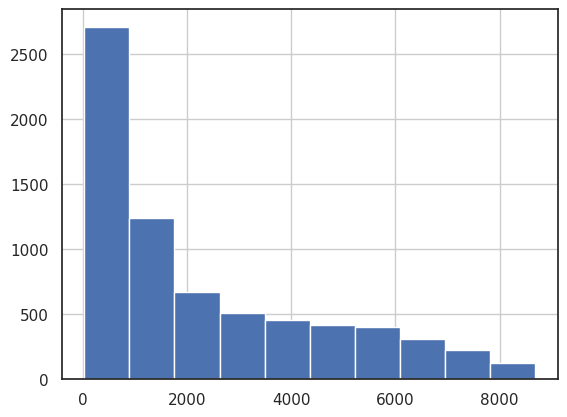

In [ ]:
df['TotalCharges'].hist()

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**label encoding untuk kolom dengan value bertingkat**

In [ ]:
for kolom in df.columns:
    print(kolom, df[kolom].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender [0 1]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService [0 1]
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling [1 0]
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 

In [ ]:
MultipleLines =  {'No phone service' : 0, 'No' : 1, 'Yes': 2}
InternetService = {'DSL' : 2, 'Fiber optic' : 1, 'No' : 0 }
OnlineSecurity =  {'No' : 1,  'Yes' : 2,  'No internet service': 0}
OnlineBackup = {'Yes' : 2, 'No' : 1, 'No internet service': 0}
DeviceProtection = {'No' : 1, 'Yes' : 2, 'No internet service' : 0}
TechSupport  = {'No' : 1, 'Yes' : 2, 'No internet service': 0}
StreamingTV = {'No' : 1,  'Yes' : 2, 'No internet service' : 0}
StreamingMovies = {'No' : 1, 'Yes' : 2, 'No internet service': 0}
Contract = {'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2}
PaymentMethod = {'Electronic check' : 0, 'Mailed check' : 1, 'Bank transfer (automatic)' : 2, 'Credit card (automatic)' : 3}

In [ ]:
df['MultipleLines'] = df['MultipleLines'].map(MultipleLines)
df['InternetService'] = df['InternetService'].map(InternetService)
df['OnlineSecurity'] = df['OnlineSecurity'].map(OnlineSecurity)
df['OnlineBackup'] = df['OnlineBackup'].map(OnlineBackup)
df['DeviceProtection'] = df['DeviceProtection'].map(DeviceProtection)
df['TechSupport'] = df['TechSupport'].map(TechSupport)
df['StreamingTV'] = df['StreamingTV'].map(StreamingTV)
df['StreamingMovies'] = df['StreamingMovies'].map(StreamingMovies)
df['Contract'] = df['Contract'].map(Contract)
df['PaymentMethod'] = df['PaymentMethod'].map(PaymentMethod)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,2,1,...,1,1,1,1,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,1,2,2,...,2,1,1,1,1,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,1,2,2,...,1,1,1,1,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,2,2,...,2,2,1,1,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,1,1,1,...,1,1,1,1,0,1,0,70.70,151.65,1


In [ ]:
df.corr()

<ipython-input-40-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.009451,0.000863,-0.014418,-0.012230,-0.004720,-0.009409,-0.008673,-0.010011,0.000126,-0.011754,-0.005209,-0.014569,-0.000002,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.113791,0.032310,0.081878,0.144828,0.140298,0.067457,0.167188,0.176469,-0.142554,0.156530,-0.093704,0.220173,0.102652,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.117307,-0.000891,0.091303,0.090753,0.098664,0.076551,0.079785,0.075098,0.294806,-0.014877,0.133115,0.096848,0.318364,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.019657,-0.044590,-0.029721,-0.062775,-0.069078,-0.040788,-0.086739,-0.101475,0.243187,-0.111377,0.123844,-0.113890,0.063593,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.258958,0.030359,0.232373,0.253743,0.253999,0.230522,0.201053,0.205031,0.671607,0.006152,0.340305,0.247900,0.825464,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.675070,-0.387436,-0.159989,-0.129770,-0.142012,-0.161930,-0.108239,-0.114715,0.002247,0.016505,-0.004070,0.247398,0.113013,0.011942
MultipleLines,-0.009451,0.113791,0.117307,-0.019657,0.258958,0.675070,1.000000,-0.186826,0.069085,0.130619,0.124502,0.069149,0.165254,0.162841,0.083343,0.133255,0.025676,0.490700,0.412166,0.036310
InternetService,0.000863,0.032310,-0.000891,-0.044590,0.030359,-0.387436,-0.186826,1.000000,0.720587,0.650962,0.646159,0.716993,0.593193,0.597266,-0.099721,0.138625,-0.008124,0.323260,0.175588,0.047291
OnlineSecurity,-0.014418,0.081878,0.091303,-0.029721,0.232373,-0.159989,0.069085,0.720587,1.000000,0.705166,0.701690,0.735191,0.662220,0.667033,0.015824,0.184993,0.036306,0.635534,0.482605,0.023309
OnlineBackup,-0.012230,0.144828,0.090753,-0.062775,0.253743,-0.129770,0.130619,0.650962,0.705166,1.000000,0.711335,0.709216,0.703167,0.700158,-0.035407,0.260715,-0.003183,0.710477,0.537169,0.074205


In [ ]:
korelasi = df.corr()
korelasi.columns

<ipython-input-41-f0edf6026c59>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

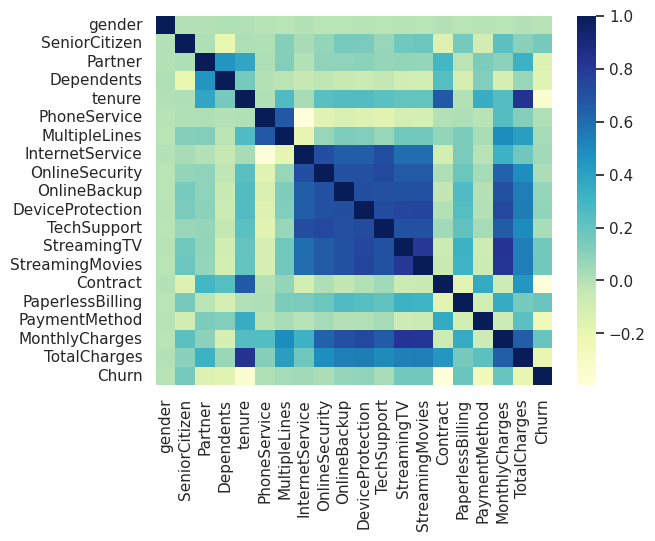

In [ ]:
sns.heatmap(korelasi, cmap="YlGnBu")
plt.show()

In [ ]:
korelasi['Churn'] = korelasi['Churn'].transpose().drop(['Churn'])

<Axes: >

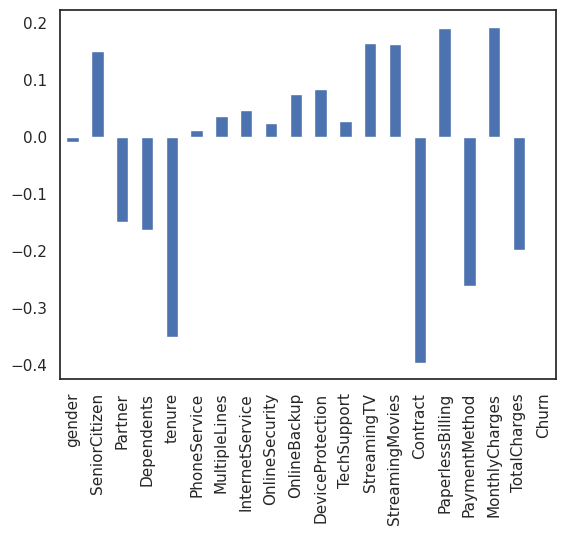

In [ ]:
korelasi['Churn'].plot(kind='bar')

In [ ]:
y = df['Churn']

In [ ]:
y.head(10)

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: Churn, dtype: uint8

In [ ]:
x = df.drop(['customerID','Churn'], axis = 1)

In [ ]:
x.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,2,1,2,1,1,1,1,0,1,0,29.85,29.85
1,1,0,0,0,34,1,1,2,2,1,2,1,1,1,1,0,1,56.95,1889.50
2,1,0,0,0,2,1,1,2,2,2,1,1,1,1,0,1,1,53.85,108.15
3,1,0,0,0,45,0,0,2,2,1,2,2,1,1,1,0,2,42.30,1840.75
4,0,0,0,0,2,1,1,1,1,1,1,1,1,1,0,1,0,70.70,151.65
5,0,0,0,0,8,1,2,1,1,1,2,1,2,2,0,1,0,99.65,820.50
6,1,0,0,1,22,1,2,1,1,2,1,1,2,1,0,1,3,89.10,1949.40
7,0,0,0,0,10,0,0,2,2,1,1,1,1,1,0,0,1,29.75,301.90
8,0,0,1,0,28,1,2,1,1,1,2,2,2,2,0,1,0,104.80,3046.05
9,1,0,0,1,62,1,1,2,2,2,1,1,1,1,1,0,2,56.15,3487.95


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   uint8  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   uint8  
 4   Dependents        7043 non-null   uint8  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   uint8  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   uint8  


NORMALISASI

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
x = scaler.fit_transform(x)
x

array([[0.        , 0.        , 1.        , ..., 0.        , 0.11542289,
        0.0012751 ],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.38507463,
        0.21586661],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.35422886,
        0.01031041],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.11293532,
        0.03780868],
       [1.        , 1.        , 1.        , ..., 0.33333333, 0.55870647,
        0.03321025],
       [1.        , 0.        , 0.        , ..., 0.66666667, 0.86965174,
        0.78764136]])

In [ ]:
print("Scaled Dataset Using MinMaxScaler")
df_x = pd.DataFrame(x)
df_x

Scaled Dataset Using MinMaxScaler


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.0,1.0,0.5,1.0,0.5,0.5,0.5,0.5,0.0,1.0,0.000000,0.115423,0.001275
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.5,1.0,1.0,0.5,1.0,0.5,0.5,0.5,0.5,0.0,0.333333,0.385075,0.215867
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.5,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.0,1.0,0.333333,0.354229,0.010310
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.0,1.0,1.0,0.5,1.0,1.0,0.5,0.5,0.5,0.0,0.666667,0.239303,0.210241
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1.0,0.000000,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,1.0,0.333333,0.662189,0.227521
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.5,1.0,1.0,0.5,1.0,1.0,0.5,1.0,1.000000,0.845274,0.847461
7040,0.0,0.0,1.0,1.0,0.152778,0.0,0.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.0,1.0,0.000000,0.112935,0.037809
7041,1.0,1.0,1.0,0.0,0.055556,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1.0,0.333333,0.558706,0.033210


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify = y, test_size = 0.25,random_state = 0)

## **Logistic Regresion model development**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logReg = LogisticRegression(max_iter=400)

In [ ]:
logReg.fit(x_train, y_train)

LogisticRegression(max_iter=400)

In [ ]:
yPredicttr = logReg.predict(x_train)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

confusion_matrixtr = pd.DataFrame((confusion_matrix(y_train, yPredicttr)), ('No churn', 'Churn'), ('No churn', 'Churn'))
confusion_matrixtr

,No churn,Churn
No churn,3519,361
Churn,653,749


In [ ]:
print (classification_report(y_train, yPredicttr))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3880
           1       0.67      0.53      0.60      1402

    accuracy                           0.81      5282
   macro avg       0.76      0.72      0.74      5282
weighted avg       0.80      0.81      0.80      5282



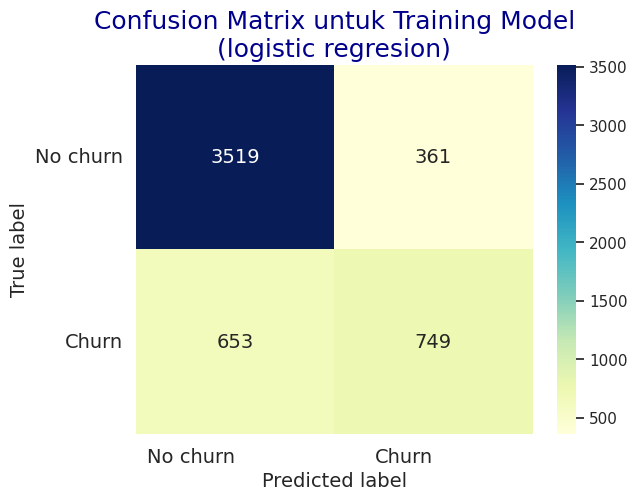

In [ ]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrixtr, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Training Model\n(logistic regresion)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data testing logistic regresion dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi sempurna 81%, dengan detail prediksi Churn yang sebenarnya Churn adalah 749, prediksi tidak Churn yang sebenarnya tidak Churn adalah 3519, prediksi tidak Churn yang sebenarnya Churn adalah 653 dan prediksi churn yang sebenarnya tidak churn adalah 361.

In [ ]:
yPredict = logReg.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

confMatrix = confusion_matrix(y_test, yPredict)
confMatrix

array([[1155,  139],
       [ 226,  241]])

In [ ]:
print (classification_report(y_test, yPredict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1294
           1       0.63      0.52      0.57       467

    accuracy                           0.79      1761
   macro avg       0.74      0.70      0.72      1761
weighted avg       0.78      0.79      0.79      1761



In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, yPredict)), ('No churn', 'Churn'), ('No churn', 'Churn'))
confusion_matrix_df

,No churn,Churn
No churn,1155,139
Churn,226,241


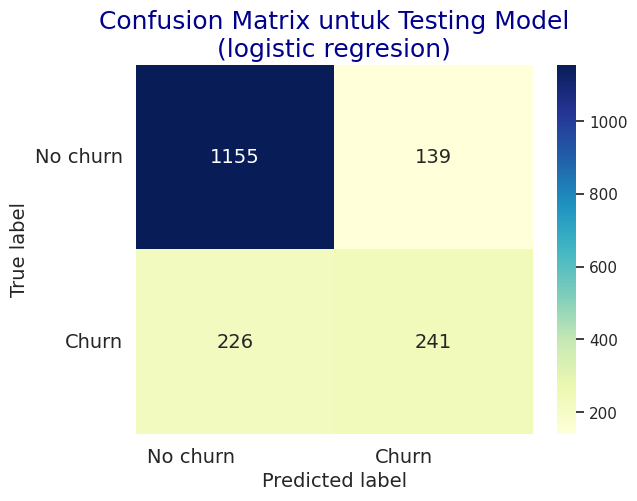

In [ ]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Testing Model\n(logistic regresion)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data testing logistic regresion dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi sempurna 79%, dengan detail prediksi Churn yang sebenarnya Churn adalah 241, prediksi tidak Churn yang sebenarnya tidak Churn adalah 1155, prediksi tidak Churn yang sebenarnya Churn adalah 226 dan prediksi churn yang sebenarnya tidak churn adalah 139.

## **XGBoost model development**

In [ ]:
y= pd.to_numeric(y, errors='coerce')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify = y, test_size = 0.25,random_state = 0)

In [ ]:
import xgboost as xgb

In [ ]:
xGBMODEL = xgb.XGBClassifier()

In [ ]:
xGBMODEL.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**XGB Train**

In [ ]:
y_train_pred = xGBMODEL.predict(x_train)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3880
           1       0.91      0.88      0.89      1402

    accuracy                           0.94      5282
   macro avg       0.93      0.92      0.93      5282
weighted avg       0.94      0.94      0.94      5282



In [ ]:
confMatrixXGBTrain = confusion_matrix(y_train, y_train_pred)
confMatrixXGBDtr = pd.DataFrame(confMatrixXGBTrain, ('No churn', 'Churn'), ('No churn', 'Churn'))

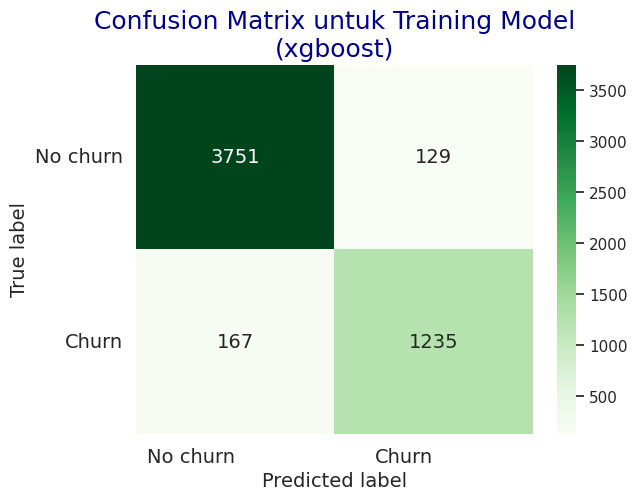

In [ ]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confMatrixXGBDtr, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Greens')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Training Model\n(xgboost)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data training XGBoost dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi 94%, dengan detail prediksi Churn yang sebenarnya Churn adalah 1235, prediksi tidak Churn yang sebenarnya tidak Churn adalah 3751, prediksi tidak Churn yang sebenarnya Churn adalah 167 dan prediksi churn yang sebenarnya tidak churn adalah 129.

**XGB TESTING**

In [ ]:
yPredictXGB = xGBMODEL.predict(x_test)

In [ ]:
confMatrixXGB = confusion_matrix(y_test, yPredictXGB)
confMatrixXGBDf = pd.DataFrame(confMatrixXGB, ('No churn', 'Churn'), ('No churn', 'Churn'))

In [ ]:
print (classification_report(y_test, yPredictXGB))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1294
           1       0.61      0.49      0.54       467

    accuracy                           0.78      1761
   macro avg       0.72      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



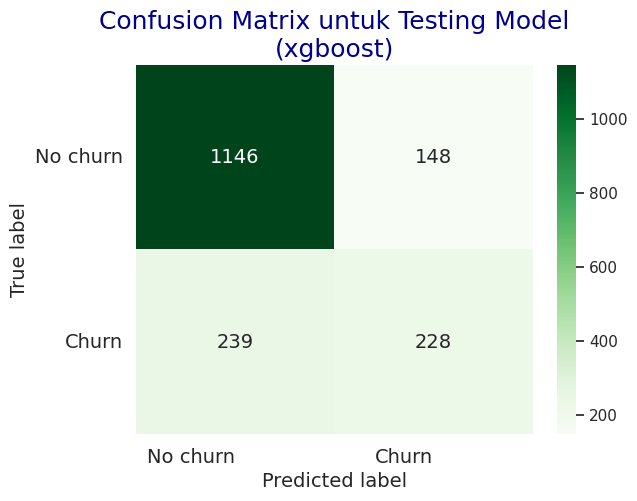

In [ ]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confMatrixXGBDf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Greens')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Testing Model\n(xgboost)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data testing XGBoost dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi 78%, dengan detail prediksi Churn yang sebenarnya Churn adalah 228, prediksi tidak Churn yang sebenarnya tidak Churn adalah 1146, prediksi tidak Churn yang sebenarnya Churn adalah 239 dan prediksi churn yang sebenarnya tidak churn adalah 148.

In [ ]:
reportXGB = classification_report(y_test, yPredictXGB, output_dict= True)
report = classification_report(y_test, yPredict, output_dict= True)

In [ ]:
compareAccuracy = {'Logistic Regression' : report['accuracy'],    'XGBoost' : reportXGB['accuracy']}

<Axes: >

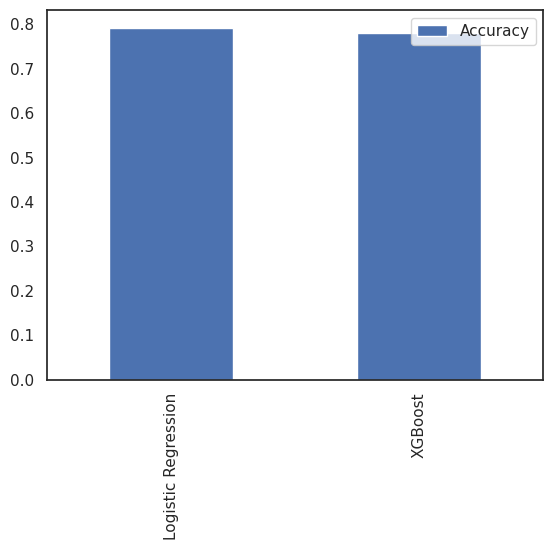

In [ ]:
pd.DataFrame(compareAccuracy, index=['Accuracy']).transpose().plot(kind='bar')

In [ ]:
pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
model_dictionary = clf.provide_models(x_train, x_test, y_train, y_test)
models

 24%|██▍       | 7/29 [00:02<00:06,  3.52it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 97%|█████████▋| 28/29 [00:12<00:00,  3.12it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
[LightGBM] [Info] Number of positive: 1402, number of negative: 3880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265430 -> initscore=-1.017935
[LightGBM] [Info] Start training from score -1.017935


100%|██████████| 29/29 [00:12<00:00,  2.25it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.73,0.75,0.75,0.75,0.03
QuadraticDiscriminantAnalysis,0.76,0.75,0.75,0.77,0.03
NearestCentroid,0.71,0.74,0.74,0.73,0.03
BernoulliNB,0.76,0.71,0.71,0.76,0.03
LinearSVC,0.80,0.71,0.71,0.79,0.51
CalibratedClassifierCV,0.80,0.71,0.71,0.79,1.64
LinearDiscriminantAnalysis,0.79,0.71,0.71,0.78,0.14
SGDClassifier,0.78,0.70,0.70,0.78,0.07
AdaBoostClassifier,0.80,0.70,0.70,0.79,0.32
